In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve


In [53]:
file_path = r"C:\Users\roxy3\OneDrive\UNCC\Spring 2025\Data mining\archive (2)\WineQT.csv"

In [55]:
data = pd.read_csv(file_path)

In [57]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [227]:
display(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_label           0
dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [61]:
data = data.drop(columns=['Id'])


In [63]:
print(f"Duplicate rows: {data.duplicated().sum()}")


Duplicate rows: 125


In [65]:
data = data.drop_duplicates()


In [67]:
print(f"Duplicate rows: {data.duplicated().sum()}")


Duplicate rows: 0


In [69]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,5.641454
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [71]:
data['quality_label'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)
data.drop(columns=['quality'], inplace=True)


In [73]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


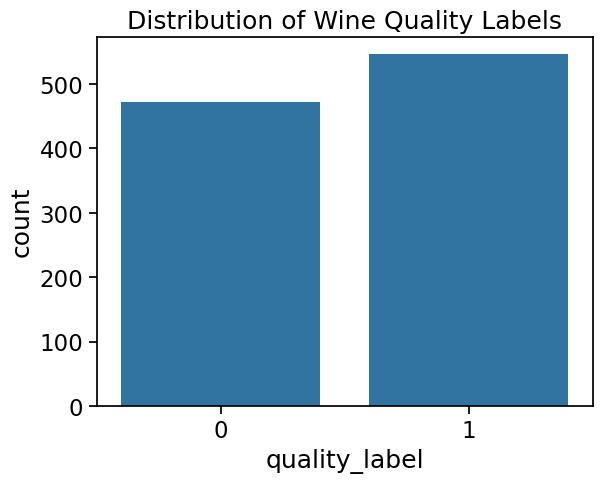

In [223]:
sns.countplot(x=data['quality_label'])
plt.title("Distribution of Wine Quality Labels")
plt.show()

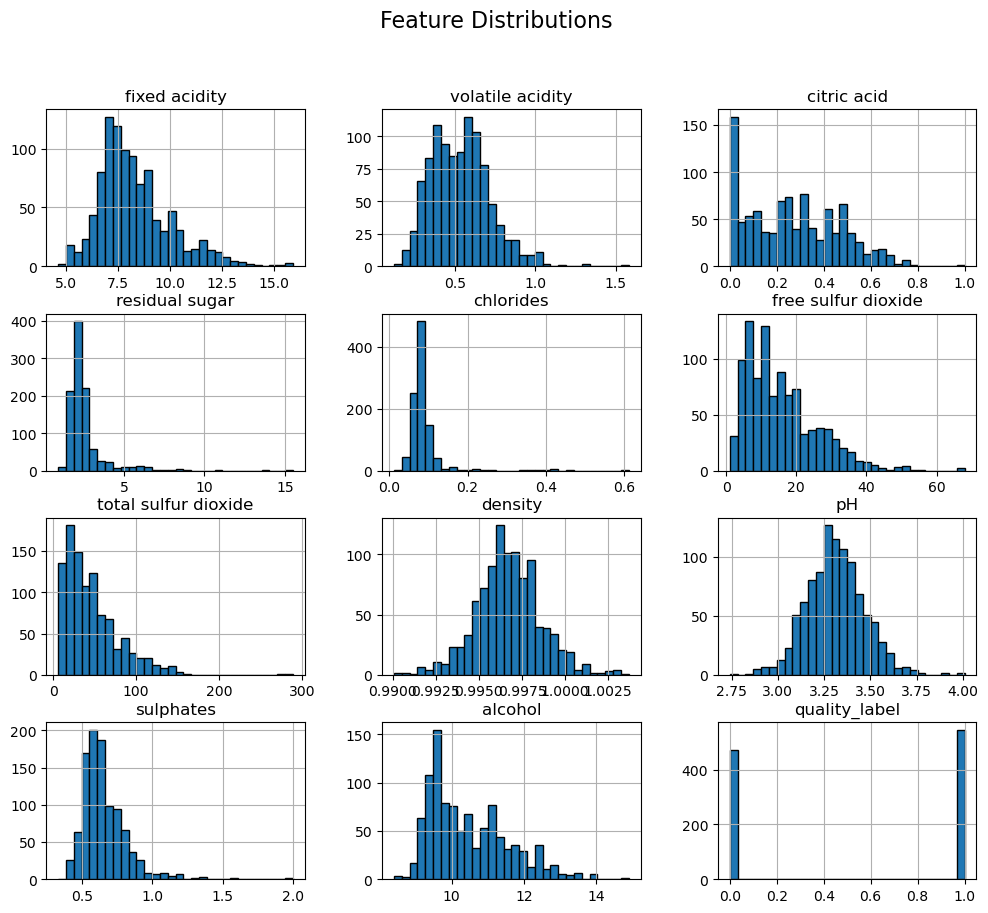

In [77]:
data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

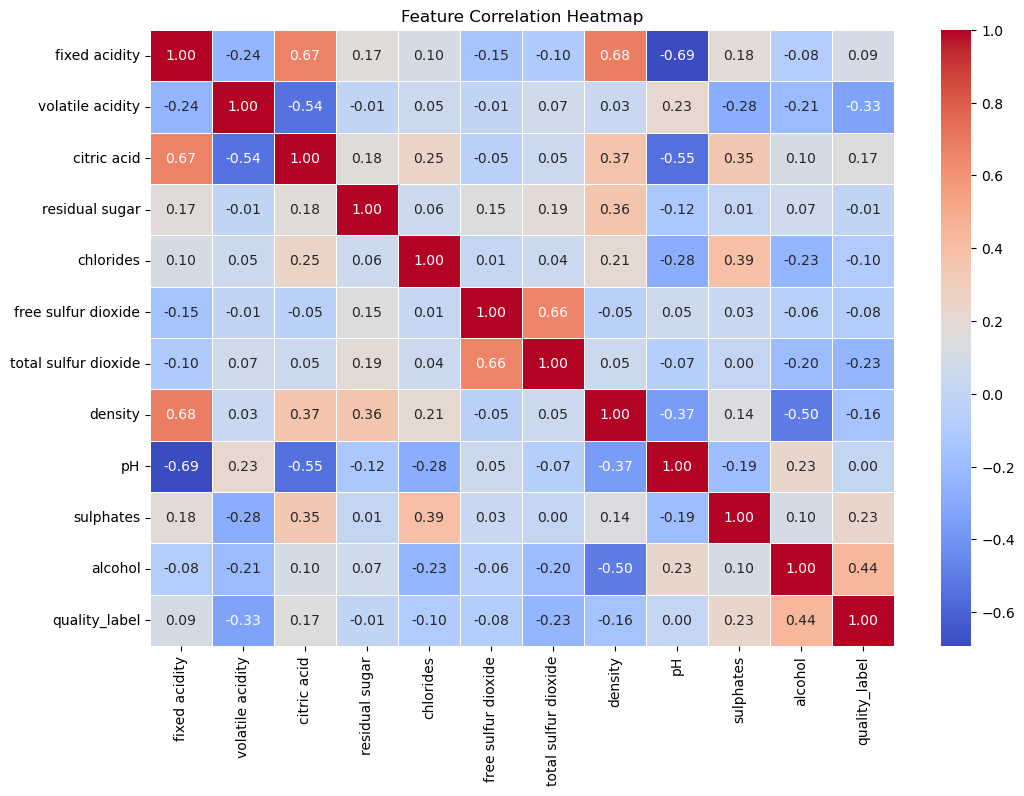

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

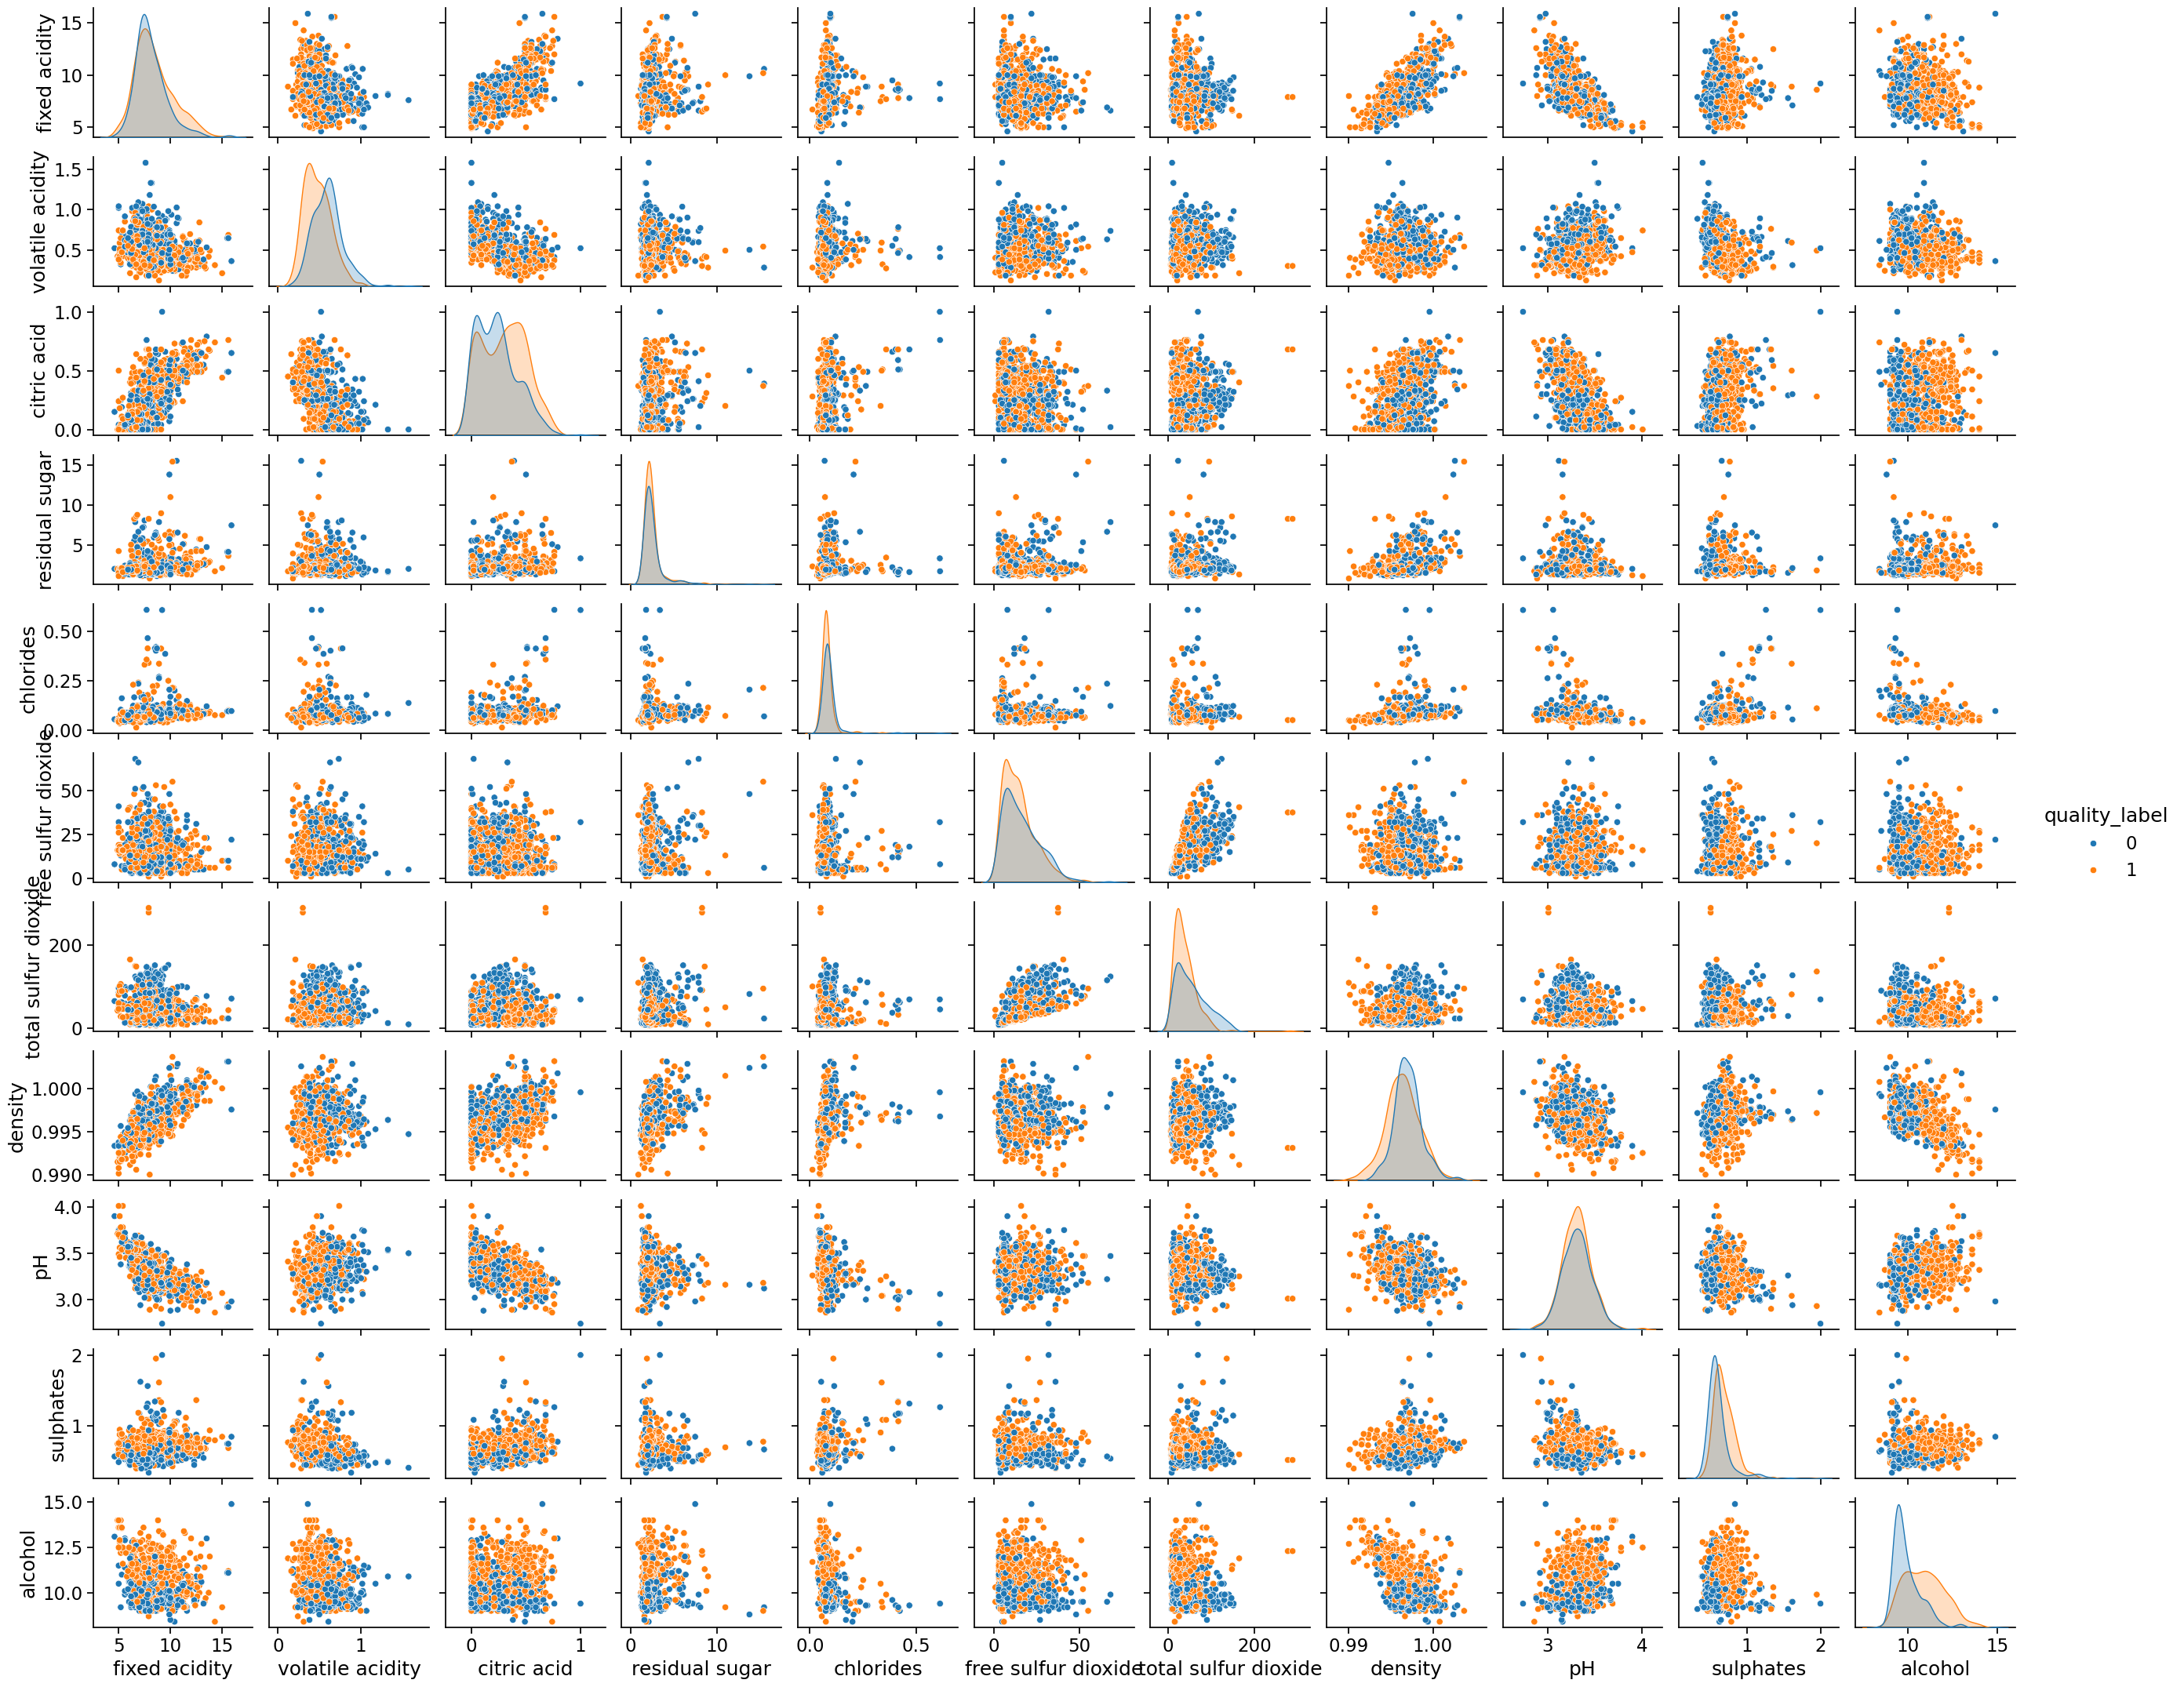

In [219]:
sns.set_context("notebook", font_scale=1.5)
sns.pairplot(data, hue="quality_label", diag_kind="kde", height=2, aspect=1.2)
plt.show()

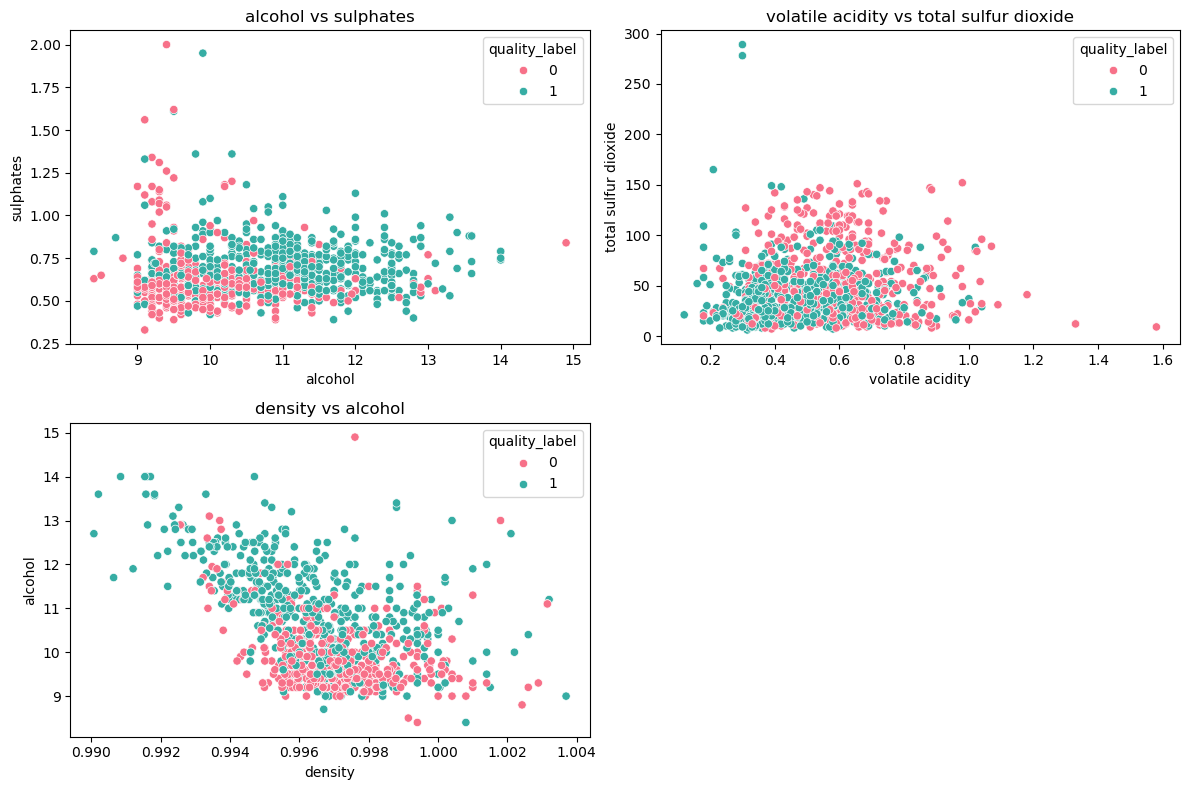

In [90]:
feature_pairs = [
    ("alcohol", "sulphates"),
    ("volatile acidity", "total sulfur dioxide"),
    ("density", "alcohol")
]

plt.figure(figsize=(12, 8))

for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[x_feature], y=data[y_feature], hue=data["quality_label"], palette="husl")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"{x_feature} vs {y_feature}")

plt.tight_layout()
plt.show()


In [225]:
X = data.drop(columns=['quality_label'])
y = data['quality_label']

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [231]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

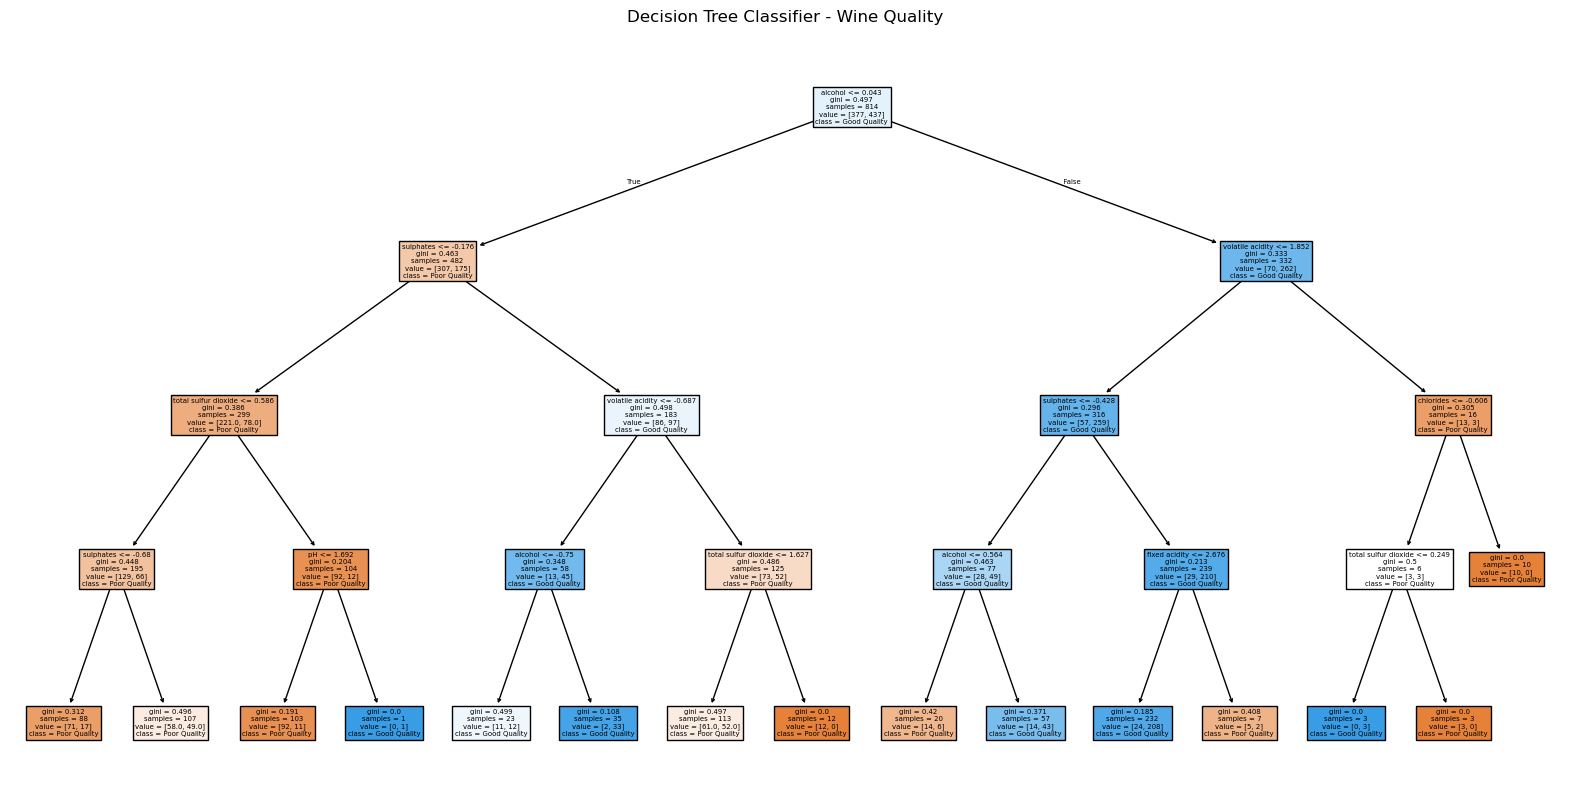

In [92]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train_scaled, y_train)
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X_train.columns, class_names=["Poor Quality", "Good Quality"], filled=True)
plt.title("Decision Tree Classifier - Wine Quality")
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)


In [157]:
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")

Decision Tree Accuracy: 0.667
              precision    recall  f1-score   support

           0       0.62      0.72      0.67        95
           1       0.72      0.62      0.67       109

    accuracy                           0.67       204
   macro avg       0.67      0.67      0.67       204
weighted avg       0.67      0.67      0.67       204



In [159]:
rf_model = RandomForestClassifier()
evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

Random Forest Accuracy: 0.745
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        95
           1       0.81      0.69      0.74       109

    accuracy                           0.75       204
   macro avg       0.75      0.75      0.75       204
weighted avg       0.75      0.75      0.74       204



In [161]:
svm_model = SVC()
evaluate_model(svm_model, X_train, X_test, y_train, y_test, "SVM")

SVM Accuracy: 0.618
              precision    recall  f1-score   support

           0       0.63      0.43      0.51        95
           1       0.61      0.78      0.69       109

    accuracy                           0.62       204
   macro avg       0.62      0.61      0.60       204
weighted avg       0.62      0.62      0.60       204



In [163]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test, "KNN")

KNN Accuracy: 0.559
              precision    recall  f1-score   support

           0       0.52      0.60      0.56        95
           1       0.60      0.52      0.56       109

    accuracy                           0.56       204
   macro avg       0.56      0.56      0.56       204
weighted avg       0.56      0.56      0.56       204



In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred))

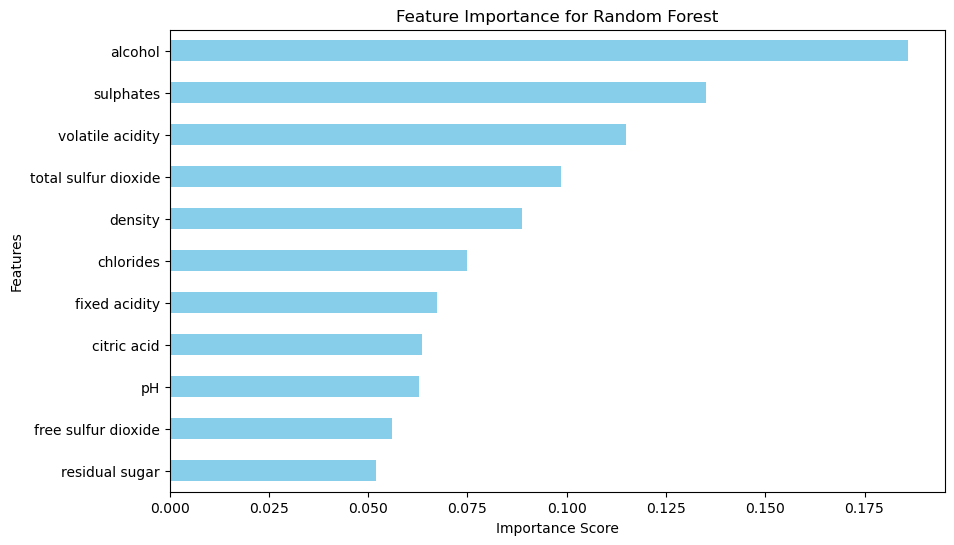

In [165]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Random Forest")
plt.show()

In [175]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7402
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        95
           1       0.79      0.71      0.74       109

    accuracy                           0.74       204
   macro avg       0.74      0.74      0.74       204
weighted avg       0.74      0.74      0.74       204



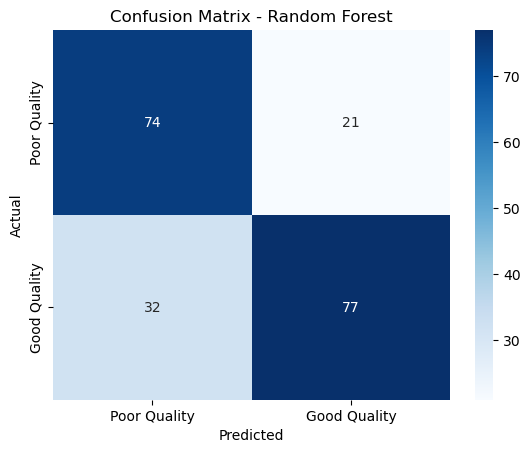

In [177]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor Quality', 'Good Quality'], yticklabels=['Poor Quality', 'Good Quality'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

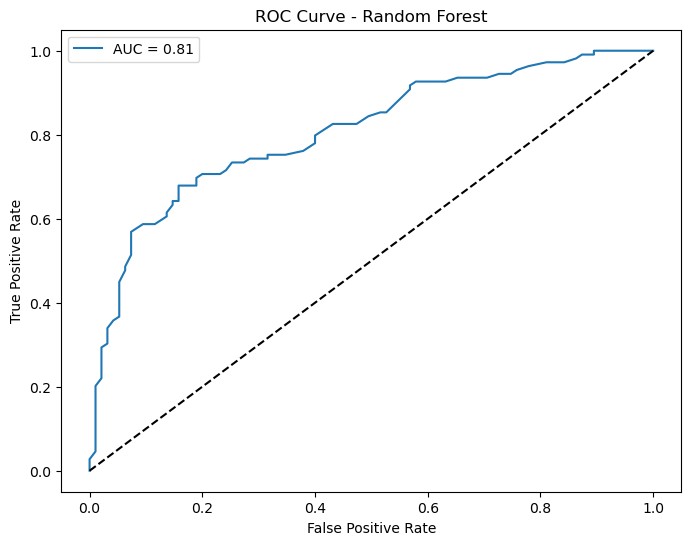

In [179]:
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

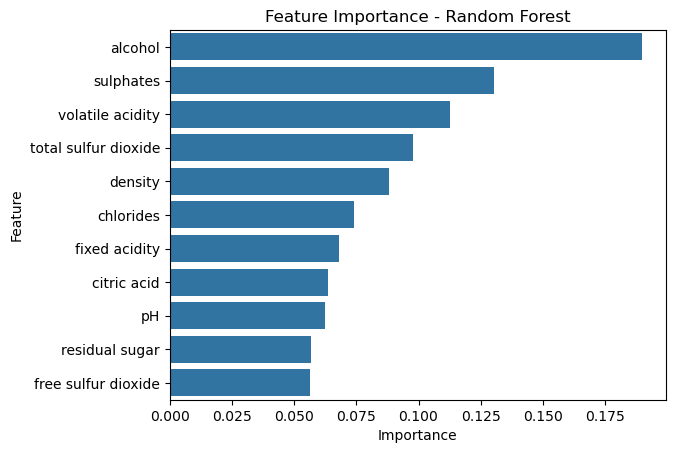

In [183]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.title("Feature Importance - Random Forest")
plt.show()

In [167]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [149]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42, max_iter=500)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        95
           1       0.79      0.70      0.74       109

    accuracy                           0.74       204
   macro avg       0.74      0.74      0.74       204
weighted avg       0.75      0.74      0.74       204



In [193]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [202]:
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

In [204]:
print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best Accuracy:", rf_grid.best_score_)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.7665379080512005


In [206]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

print("Best Parameters for SVM:", svm_grid.best_params_)
print("Best Accuracy:", svm_grid.best_score_)


Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.7628796485647202


In [207]:
rf_best = rf_grid.best_estimator_
svm_best = svm_grid.best_estimator_

rf_pred = rf_best.predict(X_test_scaled)
svm_pred = svm_best.predict(X_test_scaled)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        95
           1       0.75      0.71      0.73       109

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        95
           1       0.79      0.71      0.74       109

    accuracy                           0.74       204
   macro avg       0.74      0.74      0.74       204
weighted avg       0.74      0.74      0.74       204



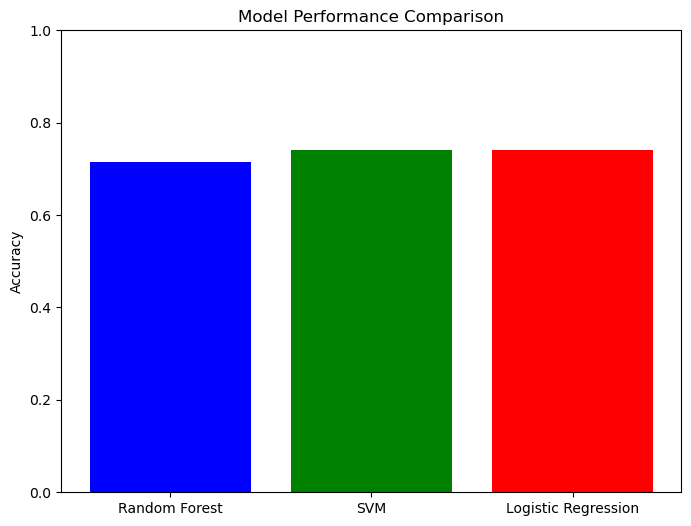

In [210]:
models = ['Random Forest', 'SVM', 'Logistic Regression']
accuracies = [accuracy_score(y_test, rf_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, log_pred)]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()